In [13]:
import pandas as pd

prices = pd.read_csv('prices.csv', sep=';')
trades = pd.read_json('trades.json')
logs = pd.read_json('logs.json')

In [14]:
prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,AMETHYSTS,9998,3,9996.0,1.0,9995.0,21.0,10004,1,10005.0,21.0,NaN,NaN,10001.0,0.000000
1,1,0,ORCHIDS,1094,10,1093.0,3.0,1086.0,41.0,1102,10,1104.0,3.0,1111.0,41.0,1098.0,0.000000
2,1,0,STARFRUIT,5048,1,5047.0,22.0,NaN,NaN,5054,22,NaN,NaN,NaN,NaN,5051.0,0.000000
3,1,100,STARFRUIT,5047,26,NaN,NaN,NaN,NaN,5052,5,5054.0,26.0,NaN,NaN,5049.5,0.000000
4,1,100,ORCHIDS,1094,6,1093.0,2.0,1087.0,51.0,1102,6,1103.0,2.0,1110.0,51.0,1098.0,-9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,99800,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.000000
2996,1,99800,ORCHIDS,1068,8,1067.0,3.0,1061.0,49.0,1075,8,1076.0,3.0,1083.0,49.0,1071.5,21088.140625
2997,1,99900,STARFRUIT,5043,28,NaN,NaN,NaN,NaN,5050,28,NaN,NaN,NaN,NaN,5046.5,0.000000
2998,1,99900,ORCHIDS,1067,7,1066.0,4.0,1059.0,49.0,1074,7,1075.0,4.0,1081.0,49.0,1070.5,21247.140625


In [15]:
trades

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,,SUBMISSION,ORCHIDS,SEASHELLS,1094,10
1,100,,SUBMISSION,ORCHIDS,SEASHELLS,1094,6
2,100,,SUBMISSION,ORCHIDS,SEASHELLS,1093,2
3,100,,SUBMISSION,ORCHIDS,SEASHELLS,1093,2
4,100,,SUBMISSION,ORCHIDS,SEASHELLS,1094,10
...,...,...,...,...,...,...,...
4712,99900,,SUBMISSION,ORCHIDS,SEASHELLS,1067,7
4713,99900,,SUBMISSION,ORCHIDS,SEASHELLS,1066,3
4714,99900,,SUBMISSION,ORCHIDS,SEASHELLS,1067,10
4715,99900,,SUBMISSION,ORCHIDS,SEASHELLS,1068,10


In [16]:
logs

,sandboxLog,lambdaLog,timestamp
0,,"[[0,"""",[[""STARFRUIT"",""STARFRUIT"",1],[""AMETHYST...",0
1,,"[[100,""{\n \""volume\"": {},\n \""exposure\"": {...",100
2,,"[[200,""{\n \""volume\"": {\n \""ORCHIDS\"": 10...",200
3,,"[[300,""{\n \""volume\"": {\n \""ORCHIDS\"": 60...",300
4,,"[[400,""{\n \""volume\"": {\n \""ORCHIDS\"": 11...",400
...,...,...,...
995,,"[[99500,""{\n \""volume\"": {\n \""ORCHIDS\"": ...",99500
996,,"[[99600,""{\n \""volume\"": {\n \""ORCHIDS\"": ...",99600
997,,"[[99700,""{\n \""volume\"": {\n \""ORCHIDS\"": ...",99700
998,,"[[99800,""{\n \""volume\"": {\n \""ORCHIDS\"": ...",99800


In [26]:
logs['lambdaLog'][0] # {"ORCHIDS":[1097.5,1099.0,0.9,10.5,-5.0,2100.0,70.0]}

'[[0,"",[["STARFRUIT","STARFRUIT",1],["AMETHYSTS","AMETHYSTS",1],["ORCHIDS","ORCHIDS",1]],{"AMETHYSTS":[{"9998":3,"9996":1,"9995":21},{"10004":-1,"10005":-21}],"ORCHIDS":[{"1094":10,"1093":3,"1086":41},{"1102":-10,"1104":-3,"1111":-41}],"STARFRUIT":[{"5048":1,"5047":22},{"5054":-22}]},[],[],{},[{},{"ORCHIDS":[1097.5,1099.0,0.9,10.5,-5.0,2100.0,70.0]}]],[["ORCHIDS",1093,-10],["ORCHIDS",1094,-10],["ORCHIDS",1095,-10],["ORCHIDS",1096,-10],["ORCHIDS",1097,-10],["ORCHIDS",1098,-10],["ORCHIDS",1099,-10],["ORCHIDS",1100,-10],["ORCHIDS",1101,-10]],0,"{\\n  \\"volume\\": {},\\n  \\"exposure\\": {},\\n  \\"ref_price\\": {\\n    \\"ORCHIDS\\": 1098.25\\n  }\\n}","ORCHIDS\\nsouth island quotes 1086.1 1094.9\\nmarket making (price, qty) 1096 -100\\n"]'

In [67]:
import re

tuple_array = []

for price in prices[prices['product'] == 'ORCHIDS'].iterrows():
    ts = price[1]['timestamp'] + 100
    ts_trades = trades[(trades['symbol'] == 'ORCHIDS') & (trades['timestamp'] == ts) & ((trades['buyer'] == 'SUBMISSION') | (trades['seller'] == 'SUBMISSION'))]
    ts_logs = logs[logs['timestamp'] == ts]
    
    if len(ts_trades) == 0 or len(ts_logs) == 0: continue
    max_price = max([trade[1]['price'] for trade in ts_trades.iterrows()])

    m = re.search('{"ORCHIDS":\\[\\d+.\\d*,(\\d+.\\d*).+\\]}', ts_logs.head(1)['lambdaLog'].iloc[0])
    if m: ask_quote = m.group(1)

    tuple_array.append((max_price, ask_quote))

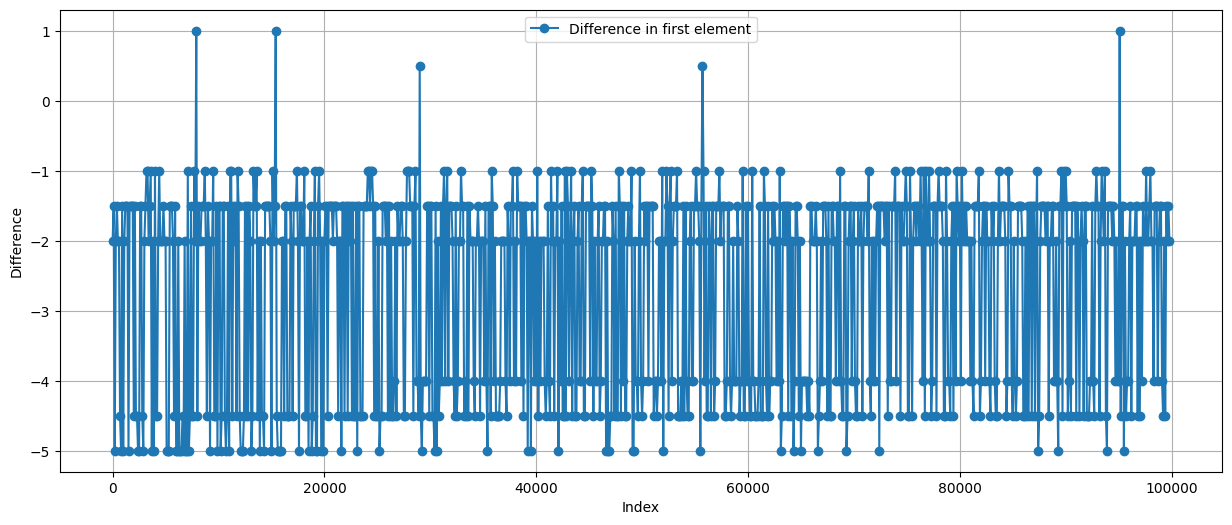

In [68]:
from matplotlib import pyplot as plt

x_values = prices[prices['product'] == 'ORCHIDS']['timestamp'].iloc[:-1]
diffs = [float(e[0]) - float(e[1]) for e in tuple_array]

# Plot differences
plt.figure(figsize=(15, 6))
plt.plot(x_values, diffs, marker='o', label='Difference')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.grid(True)
plt.legend()
plt.show()

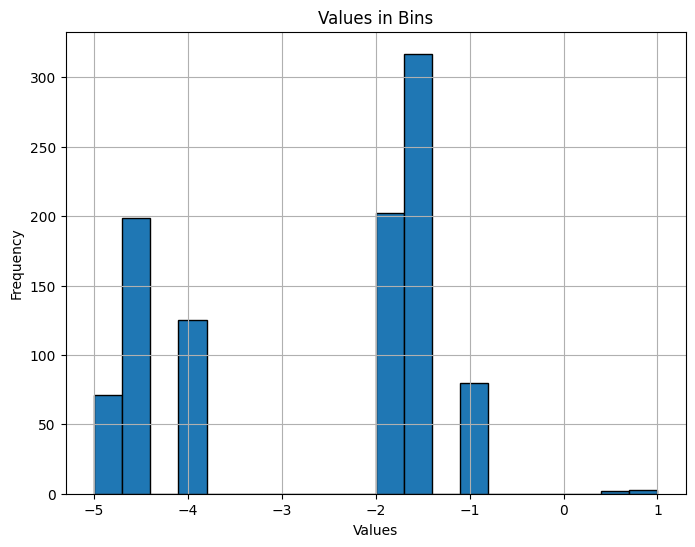

In [74]:
plt.figure(figsize=(8, 6))
plt.hist(diffs, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Values in Bins')
plt.grid(True)
plt.show()